# Tournament Graphs

## Target Area = Area/Num Children graphs

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
sns.set_theme(style="whitegrid", palette="Set2")


### Ratio Scores across different target areas for all groups

In [97]:
df = pd.read_csv('results.csv')

In [98]:
unique_groups = sorted(df["group"].unique())
palette = sns.color_palette("Set2", n_colors=len(unique_groups))
player_colors = dict(zip(unique_groups, palette))
#print(player_colors)

In [99]:
# clean up the code a little
df["children"] = pd.to_numeric(df["children"], errors="coerce")
df["ratios_stdev"] = pd.to_numeric(df["ratios_stdev"], errors="coerce")


In [100]:
df = df[df["ratios_stdev"] >= 0]

In [101]:
children_summary = df.groupby("cake_path")["children"].agg(["min", "median", "max"]).reset_index()

In [102]:
# Merge for each condition
min_df = df.merge(children_summary[["cake_path", "min"]], left_on=["cake_path", "children"], right_on=["cake_path", "min"])
mid_df = df.merge(children_summary[["cake_path", "median"]], left_on=["cake_path", "children"], right_on=["cake_path", "median"])
max_df = df.merge(children_summary[["cake_path", "max"]], left_on=["cake_path", "children"], right_on=["cake_path", "max"])


/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/2745403081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=min_df, x="group", y="ratios_stdev", ax=axes[0] , palette=player_colors)
/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/2745403081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mid_df, x="group", y="ratios_stdev", ax=axes[1],palette=player_colors)
/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/2745403081.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=max

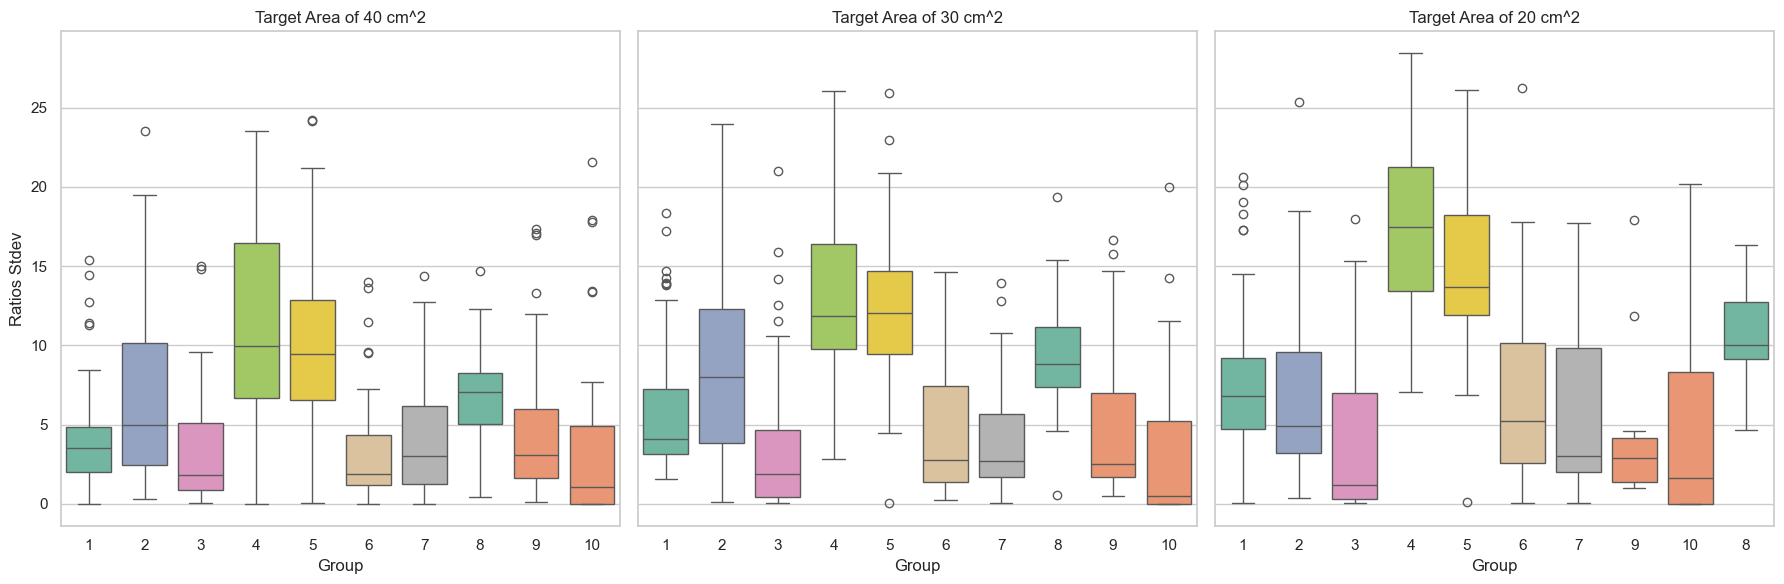

In [103]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.boxplot(data=min_df, x="group", y="ratios_stdev", ax=axes[0] , palette=player_colors)
axes[0].set_title("Target Area of 40 cm^2")
axes[0].set_xlabel("Group")
axes[0].set_ylabel("Ratios Stdev")

sns.boxplot(data=mid_df, x="group", y="ratios_stdev", ax=axes[1],palette=player_colors)
axes[1].set_title("Target Area of 30 cm^2")
axes[1].set_xlabel("Group")

sns.boxplot(data=max_df, x="group", y="ratios_stdev", ax=axes[2], palette=player_colors)
axes[2].set_title("Target Area of 20 cm^2")
axes[2].set_xlabel("Group")

plt.tight_layout()
plt.savefig('ratio_children_with_bad_size_spans.pdf')
plt.show()


### Ratio Scores Without Players that Fail on Size Span

In [104]:
df = pd.read_csv('results.csv')

In [105]:
unique_groups = sorted(df["group"].unique())
palette = sns.color_palette("Set2", n_colors=len(unique_groups))
player_colors = dict(zip(unique_groups, palette))

# clean up the code a little
df["children"] = pd.to_numeric(df["children"], errors="coerce")
df["ratios_stdev"] = pd.to_numeric(df["ratios_stdev"], errors="coerce")
df["size_span"] = pd.to_numeric(df["size_span"], errors="coerce")


df = df[df["ratios_stdev"] >= 0]

df = df[df["size_span"] <= 0.5]

In [106]:
children_summary = df.groupby("cake_path")["children"].agg(["min", "median", "max"]).reset_index()

In [107]:
# Merge for each condition
min_df = df.merge(children_summary[["cake_path", "min"]], left_on=["cake_path", "children"], right_on=["cake_path", "min"])
mid_df = df.merge(children_summary[["cake_path", "median"]], left_on=["cake_path", "children"], right_on=["cake_path", "median"])
max_df = df.merge(children_summary[["cake_path", "max"]], left_on=["cake_path", "children"], right_on=["cake_path", "max"])

/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/2727907391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=min_df, x="group", y="ratios_stdev", ax=axes[0] , palette=player_colors)
/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/2727907391.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mid_df, x="group", y="ratios_stdev", ax=axes[1],palette=player_colors)
/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/2727907391.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=max

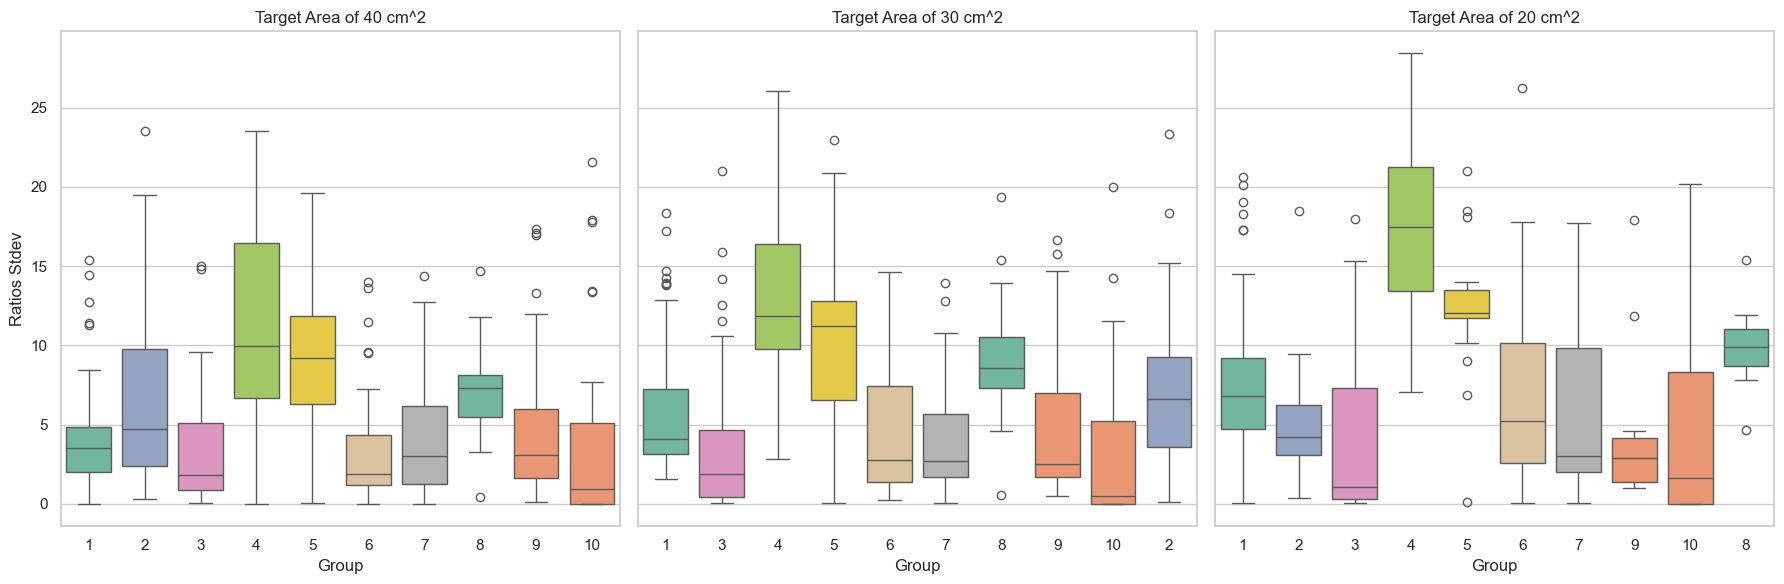

In [108]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.boxplot(data=min_df, x="group", y="ratios_stdev", ax=axes[0] , palette=player_colors)
axes[0].set_title("Target Area of 40 cm^2")
axes[0].set_xlabel("Group")
axes[0].set_ylabel("Ratios Stdev")

sns.boxplot(data=mid_df, x="group", y="ratios_stdev", ax=axes[1],palette=player_colors)
axes[1].set_title("Target Area of 30 cm^2")
axes[1].set_xlabel("Group")

sns.boxplot(data=max_df, x="group", y="ratios_stdev", ax=axes[2], palette=player_colors)
axes[2].set_title("Target Area of 20 cm^2")
axes[2].set_xlabel("Group")

plt.tight_layout()
plt.savefig('ratio_children_remove_bad_sizes.pdf')
plt.show()

### Size Spans Across All Players for target children area

In [109]:
df = pd.read_csv('results.csv')

In [110]:
unique_groups = sorted(df["group"].unique())
palette = sns.color_palette("Set2", n_colors=len(unique_groups))
player_colors = dict(zip(unique_groups, palette))

# clean up the code a little
df["children"] = pd.to_numeric(df["children"], errors="coerce")
df["ratios_stdev"] = pd.to_numeric(df["ratios_stdev"], errors="coerce")
df["size_span"] = pd.to_numeric(df["size_span"], errors="coerce")


df = df[df["size_span"] >= 0]


In [111]:
children_summary = df.groupby("cake_path")["children"].agg(["min", "median", "max"]).reset_index()
# Merge for each condition
min_df = df.merge(children_summary[["cake_path", "min"]], left_on=["cake_path", "children"], right_on=["cake_path", "min"])
mid_df = df.merge(children_summary[["cake_path", "median"]], left_on=["cake_path", "children"], right_on=["cake_path", "median"])
max_df = df.merge(children_summary[["cake_path", "max"]], left_on=["cake_path", "children"], right_on=["cake_path", "max"])

/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/3427561203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=min_df, x="group", y="size_span", ax=axes[0] , palette=player_colors)
/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/3427561203.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mid_df, x="group", y="size_span", ax=axes[1],palette=player_colors)
/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/3427561203.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=max_df, x

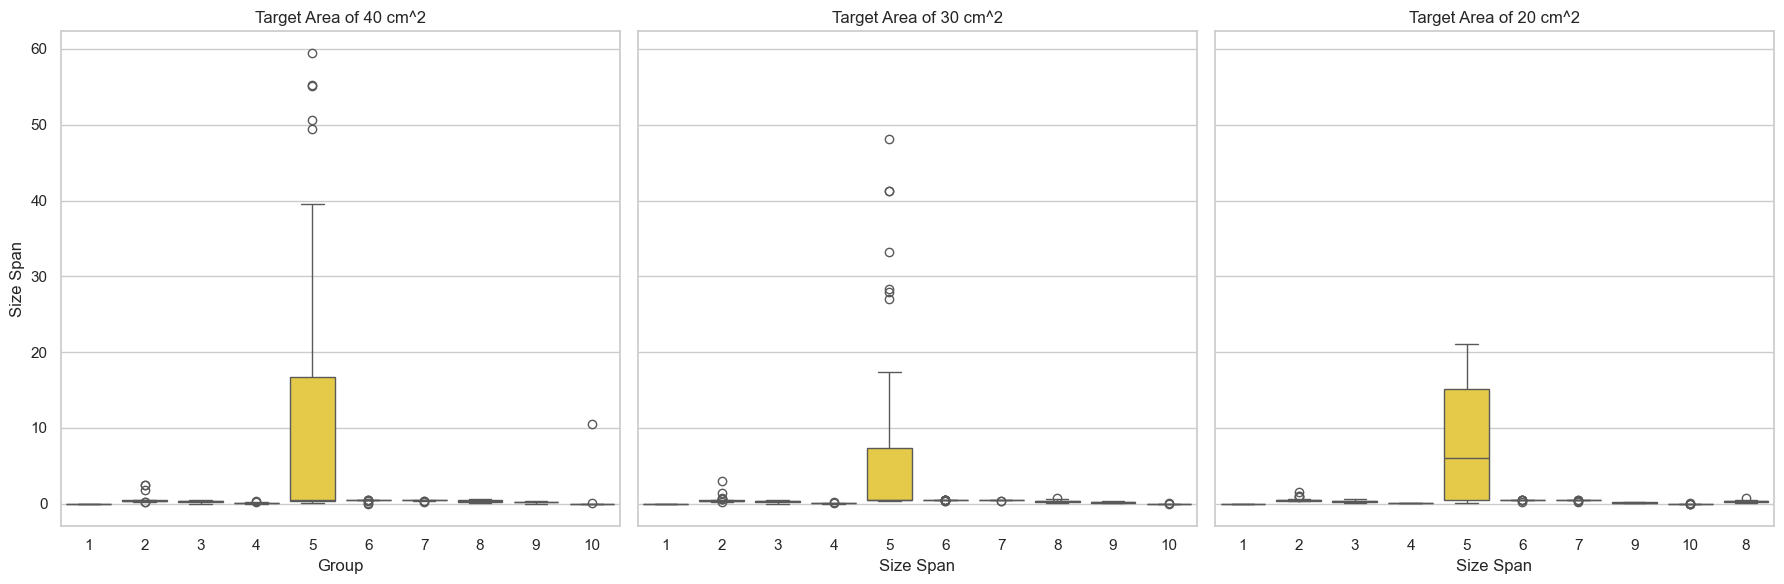

In [112]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.boxplot(data=min_df, x="group", y="size_span", ax=axes[0] , palette=player_colors)
axes[0].set_title("Target Area of 40 cm^2")
axes[0].set_xlabel("Group")
axes[0].set_ylabel("Size Span")

sns.boxplot(data=mid_df, x="group", y="size_span", ax=axes[1],palette=player_colors)
axes[1].set_title("Target Area of 30 cm^2")
axes[1].set_xlabel("Size Span")

sns.boxplot(data=max_df, x="group", y="size_span", ax=axes[2], palette=player_colors)
axes[2].set_title("Target Area of 20 cm^2")
axes[2].set_xlabel("Size Span")

plt.tight_layout()
plt.savefig('size_children.pdf')
plt.show()

### Runtime for different target areas

In [113]:
df = pd.read_csv('results.csv')

In [114]:
unique_groups = sorted(df["group"].unique())
palette = sns.color_palette("Set2", n_colors=len(unique_groups))
player_colors = dict(zip(unique_groups, palette))

# clean up the code a little
df["children"] = pd.to_numeric(df["children"], errors="coerce")
df["ratios_stdev"] = pd.to_numeric(df["ratios_stdev"], errors="coerce")
df["size_span"] = pd.to_numeric(df["size_span"], errors="coerce")
df["seconds"] = pd.to_numeric(df["seconds"], errors="coerce")


df = df[df["seconds"] >= 0]

In [115]:
children_summary = df.groupby("cake_path")["children"].agg(["min", "median", "max"]).reset_index()
# Merge for each condition
min_df = df.merge(children_summary[["cake_path", "min"]], left_on=["cake_path", "children"], right_on=["cake_path", "min"])
mid_df = df.merge(children_summary[["cake_path", "median"]], left_on=["cake_path", "children"], right_on=["cake_path", "median"])
max_df = df.merge(children_summary[["cake_path", "max"]], left_on=["cake_path", "children"], right_on=["cake_path", "max"])

/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/1467054228.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=min_df, x="group", y="seconds", ax=axes[0] , palette=player_colors)
/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/1467054228.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mid_df, x="group", y="seconds", ax=axes[1],palette=player_colors)
/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/1467054228.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=max_df, x="gr

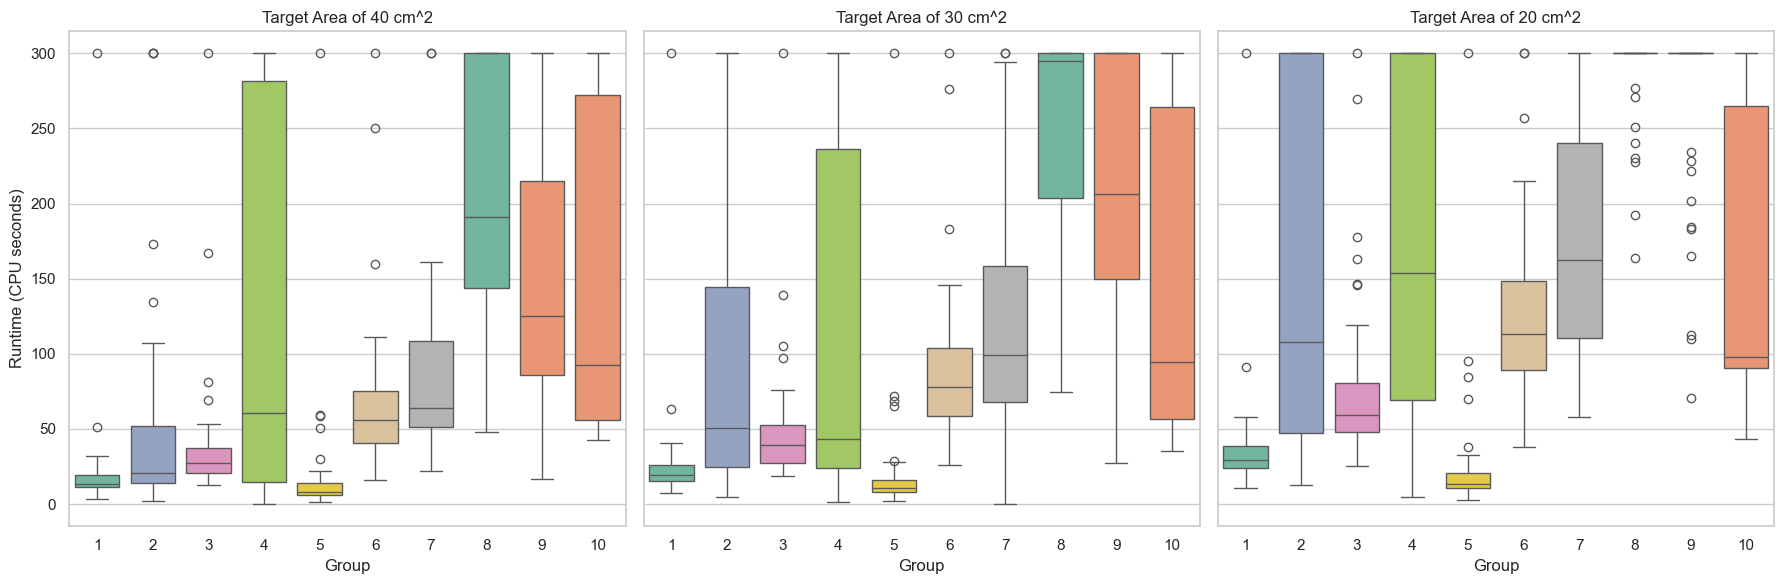

In [116]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.boxplot(data=min_df, x="group", y="seconds", ax=axes[0] , palette=player_colors)
axes[0].set_title("Target Area of 40 cm^2")
axes[0].set_xlabel("Group")
axes[0].set_ylabel("Runtime (CPU seconds)")

sns.boxplot(data=mid_df, x="group", y="seconds", ax=axes[1],palette=player_colors)
axes[1].set_title("Target Area of 30 cm^2")
axes[1].set_xlabel("Group")

sns.boxplot(data=max_df, x="group", y="seconds", ax=axes[2], palette=player_colors)
axes[2].set_title("Target Area of 20 cm^2")
axes[2].set_xlabel("Group")

plt.tight_layout()
plt.savefig('runtime_children.pdf')
plt.show()

## Cake Specific Plots

### Ratio Plots - only Successes

/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/755759113.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x="group", y="ratios_stdev", ax=ax, palette=player_colors)
/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/755759113.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x="group", y="ratios_stdev", ax=ax, palette=player_colors)
/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/755759113.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x="gro

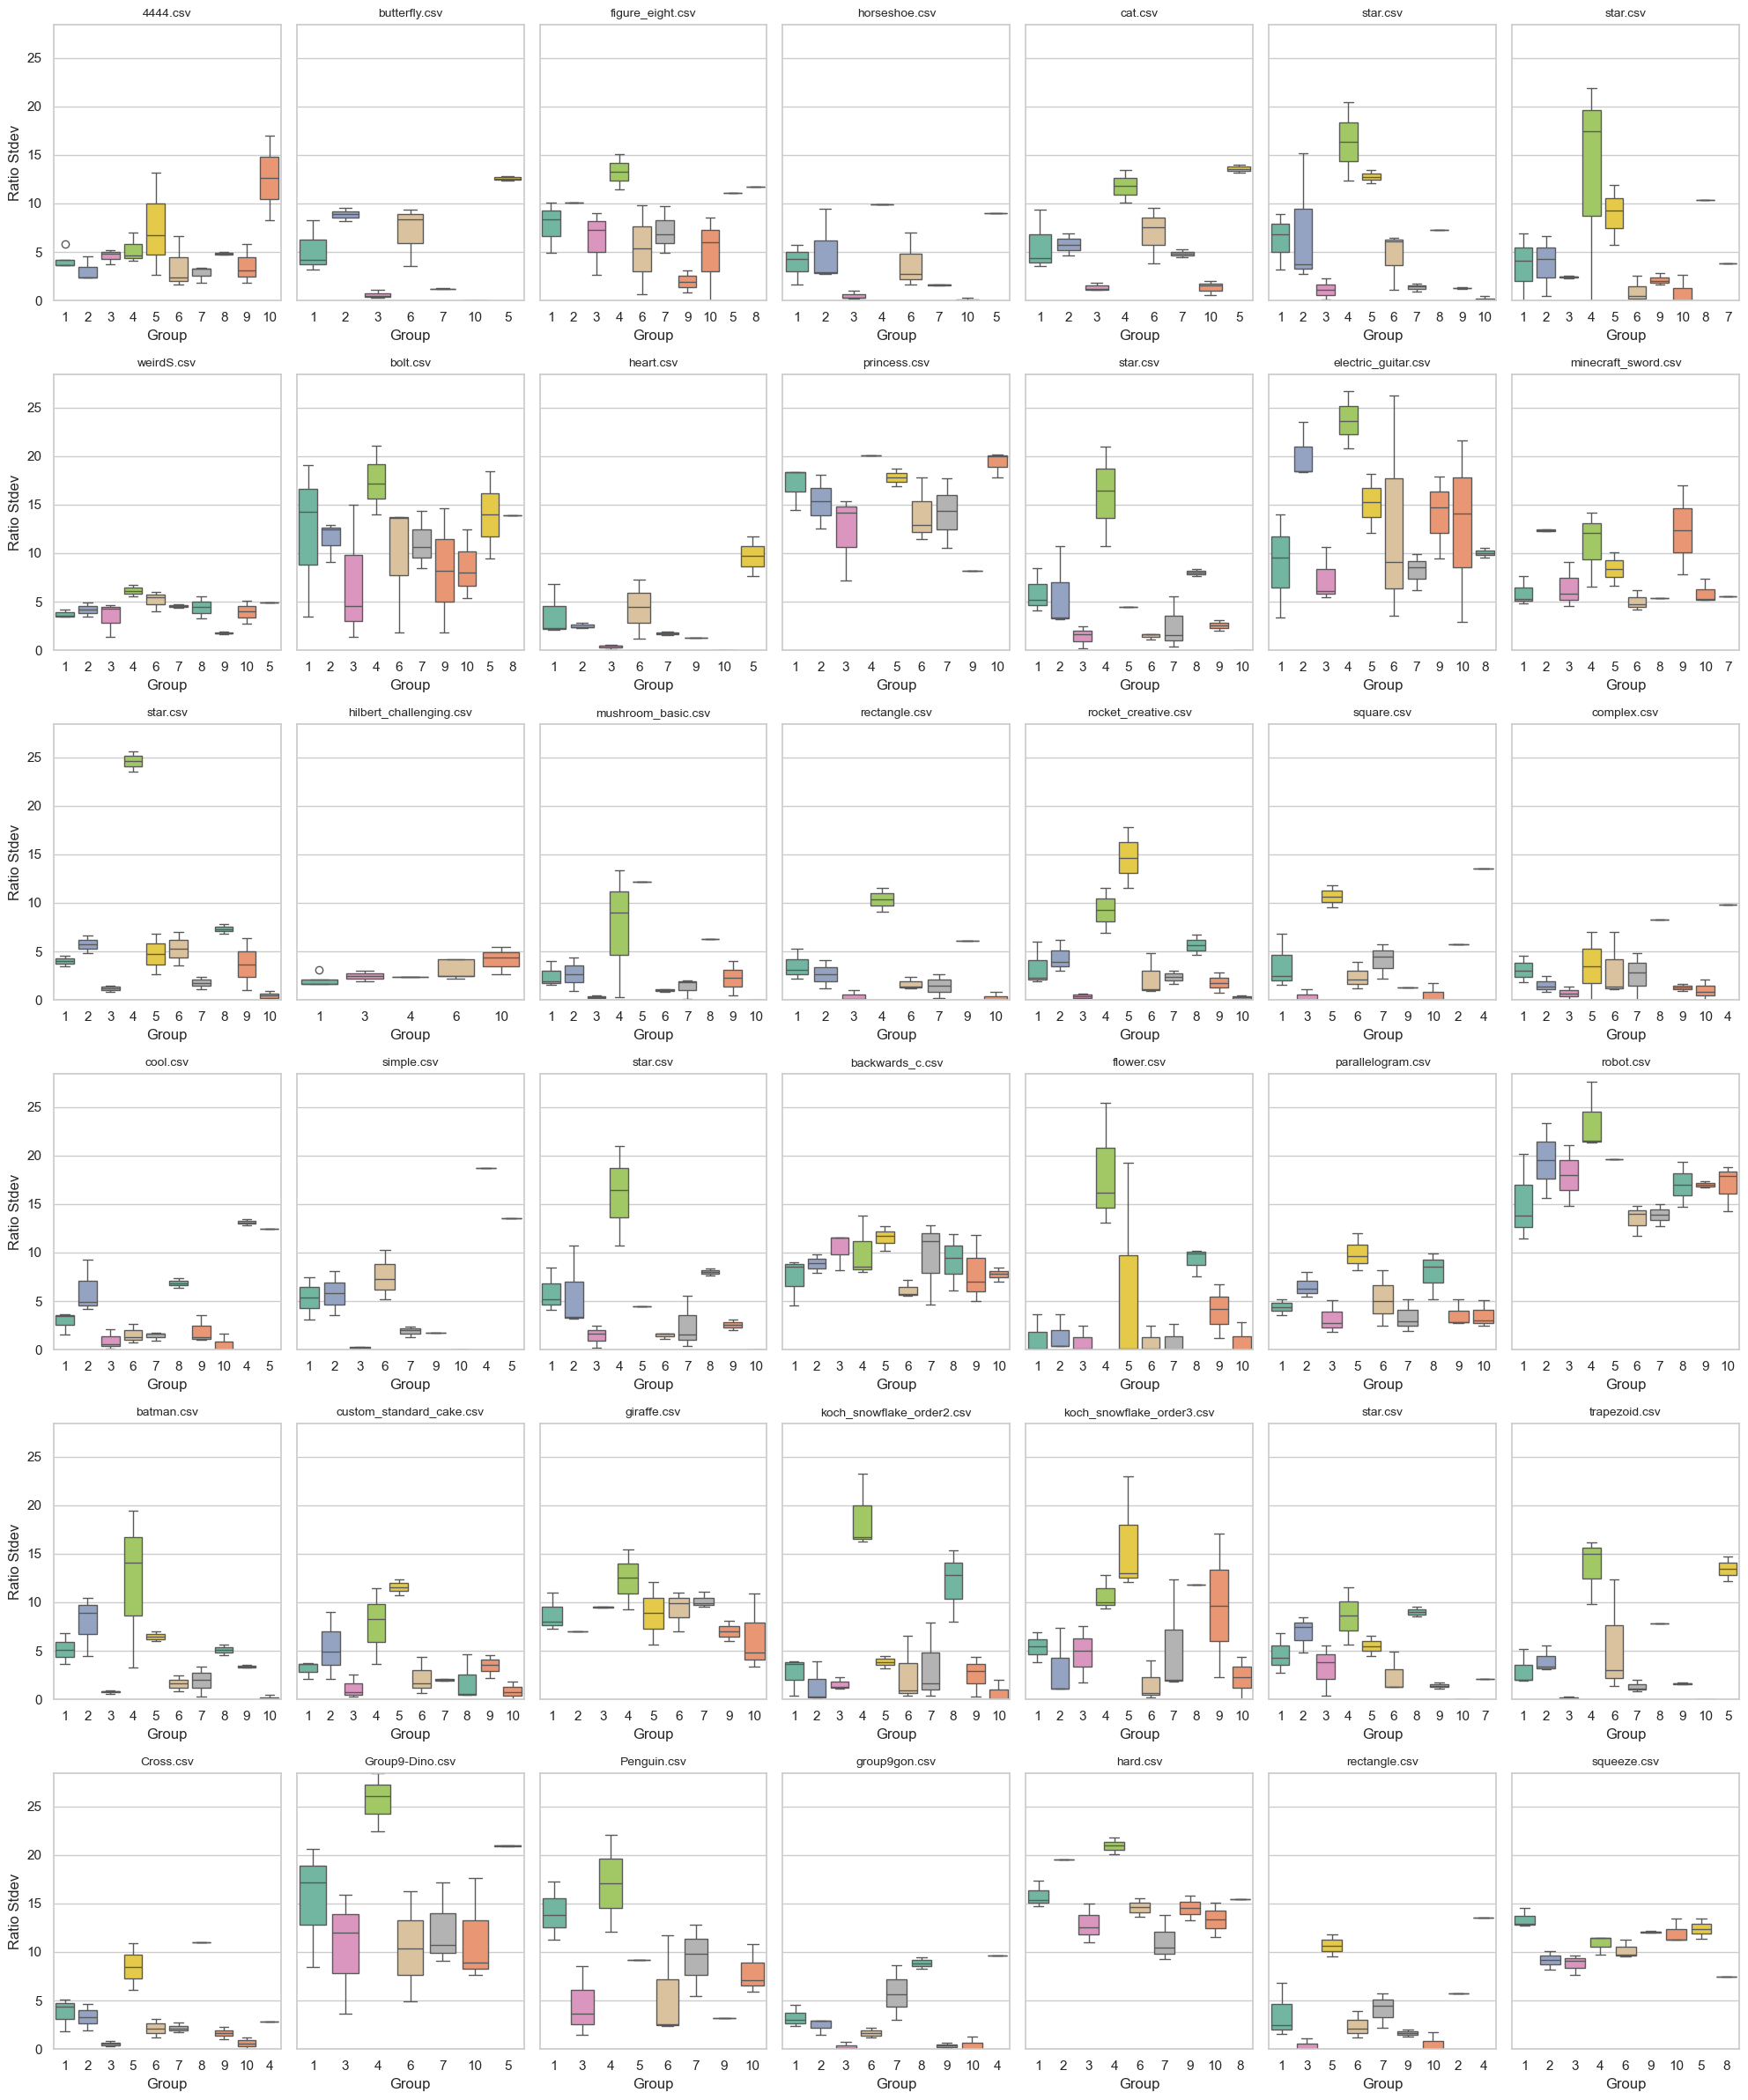

In [117]:
# Load and clean the data
df = pd.read_csv("results.csv")

unique_groups = sorted(df["group"].unique())
palette = sns.color_palette("Set2", n_colors=len(unique_groups))
player_colors = dict(zip(unique_groups, palette))

df["ratios_stdev"] = pd.to_numeric(df["ratios_stdev"], errors="coerce")
df["size_span"] = pd.to_numeric(df["size_span"], errors="coerce")
df = df[df["ratios_stdev"].notna() & (df["ratios_stdev"] >= 0)]
df = df[df["size_span"].notna() & (df["size_span"] < 0.5)]

# Unique cake paths
cake_paths = df["cake_path"].unique()

# Set grid layout: 6 rows × 7 columns
rows, cols = 6, 7

# Shared y-axis range
ymin, ymax = df["ratios_stdev"].min(), df["ratios_stdev"].max()

fig, axes = plt.subplots(rows, cols, figsize=(20, 24), sharey=True)
axes = axes.flatten()

for ax, cake_path in zip(axes, cake_paths):
    subset = df[df["cake_path"] == cake_path]
    sns.boxplot(data=subset, x="group", y="ratios_stdev", ax=ax, palette=player_colors)
    ax.set_title(f"{cake_path.split('/')[-1]}", fontsize=10)
    ax.set_xlabel("Group")
    ax.set_ylabel("Ratio Stdev")
    ax.set_ylim(ymin, ymax)

# Remove unused axes if there are fewer cake_paths than grid cells
for i in range(len(cake_paths), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig('all_cakes_group_ratio.pdf')
plt.show()

### Size Span Plots - All Sizes

/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/187662114.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x="group", y="size_span", ax=ax, palette=player_colors)
/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/187662114.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x="group", y="size_span", ax=ax, palette=player_colors)
/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/187662114.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x="group", y

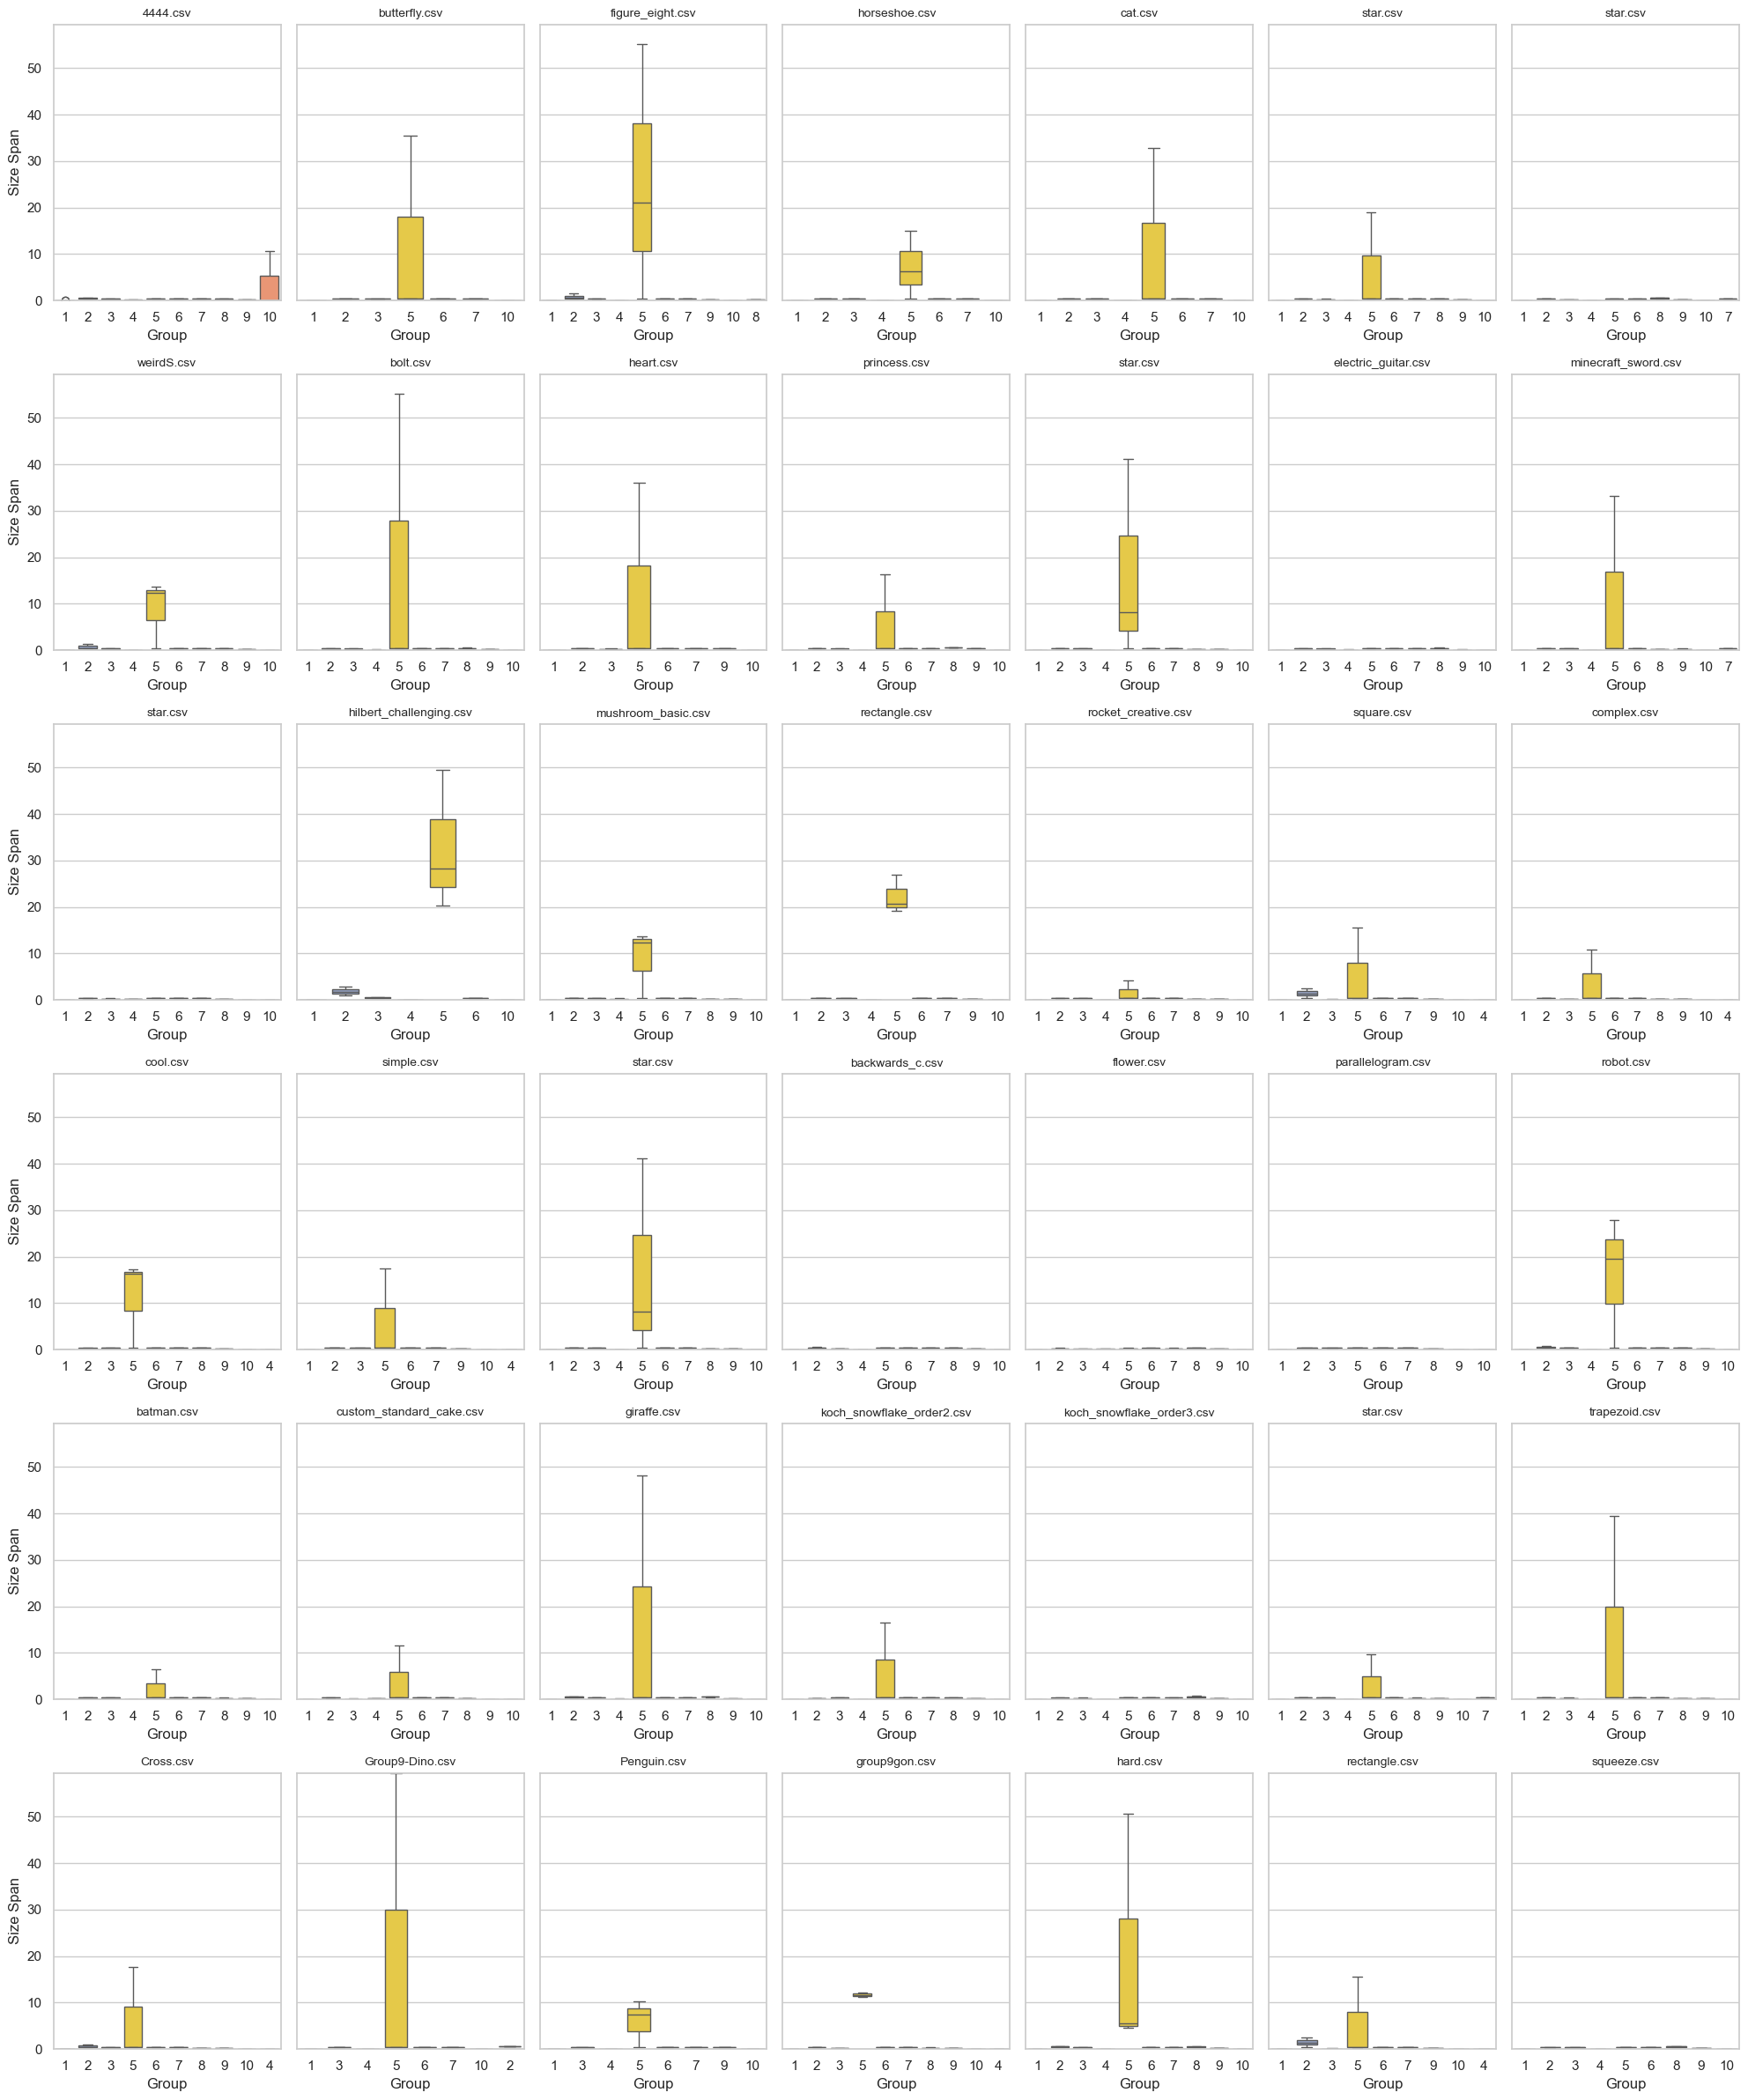

In [118]:
# Load and clean the data
df = pd.read_csv("results.csv")

unique_groups = sorted(df["group"].unique())
palette = sns.color_palette("Set2", n_colors=len(unique_groups))
player_colors = dict(zip(unique_groups, palette))

df["ratios_stdev"] = pd.to_numeric(df["ratios_stdev"], errors="coerce")
df["size_span"] = pd.to_numeric(df["size_span"], errors="coerce")
#df = df[df["ratios_stdev"].notna() & (df["ratios_stdev"] >= 0)]
df = df[df["size_span"].notna() & (df["size_span"] >= 0)]

# Unique cake paths
cake_paths = df["cake_path"].unique()

# Set grid layout: 6 rows × 7 columns
rows, cols = 6, 7

# Shared y-axis range
ymin, ymax = df["size_span"].min(), df["size_span"].max()

fig, axes = plt.subplots(rows, cols, figsize=(20, 24), sharey=True)
axes = axes.flatten()

for ax, cake_path in zip(axes, cake_paths):
    subset = df[df["cake_path"] == cake_path]
    sns.boxplot(data=subset, x="group", y="size_span", ax=ax, palette=player_colors)
    ax.set_title(f"{cake_path.split('/')[-1]}", fontsize=10)
    ax.set_xlabel("Group")
    ax.set_ylabel("Size Span")
    ax.set_ylim(ymin, ymax)

# Remove unused axes if there are fewer cake_paths than grid cells
for i in range(len(cake_paths), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig('all_cakes_group_size.pdf')
plt.show()

### Size Span within limits

/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/4150634888.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x="group", y="size_span", ax=ax, palette=player_colors)
/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/4150634888.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x="group", y="size_span", ax=ax, palette=player_colors)
/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/4150634888.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x="group"

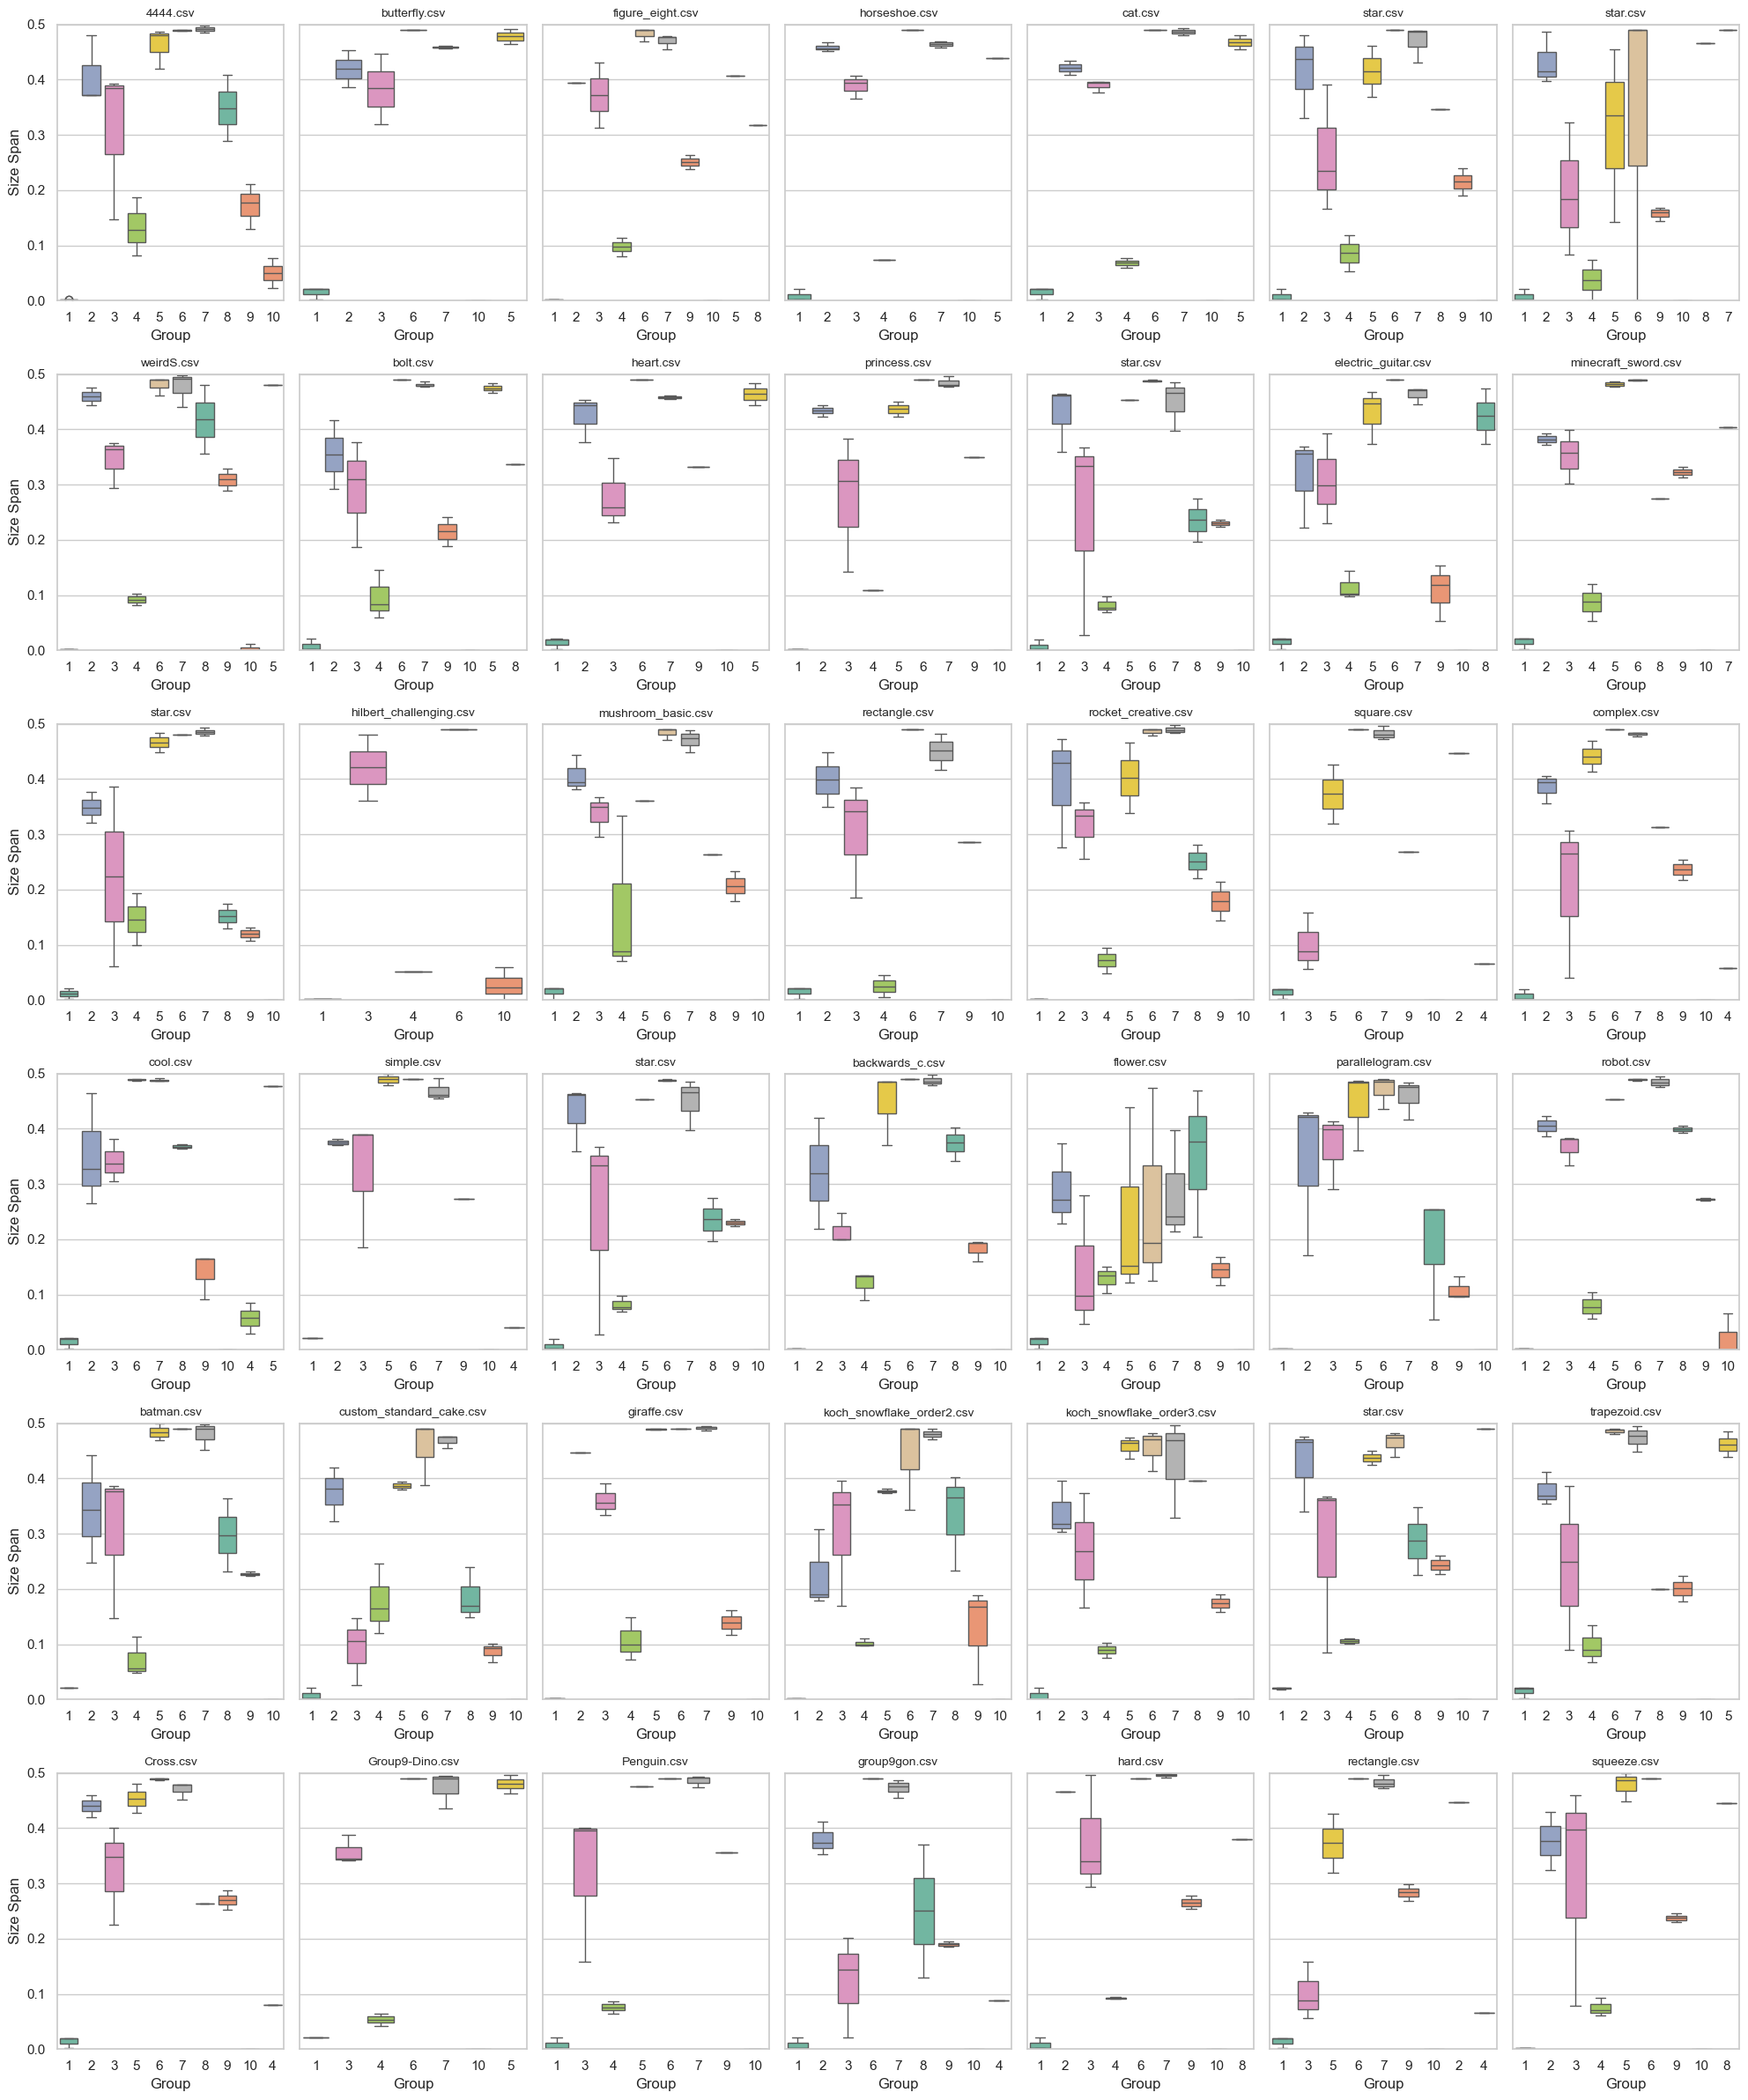

In [119]:
# Load and clean the data
df = pd.read_csv("results.csv")

unique_groups = sorted(df["group"].unique())
palette = sns.color_palette("Set2", n_colors=len(unique_groups))
player_colors = dict(zip(unique_groups, palette))

df["ratios_stdev"] = pd.to_numeric(df["ratios_stdev"], errors="coerce")
df["size_span"] = pd.to_numeric(df["size_span"], errors="coerce")
#df = df[df["ratios_stdev"].notna() & (df["ratios_stdev"] >= 0)]
df = df[df["size_span"].notna() & (df["size_span"] >= 0) & (df["size_span"] <= 0.5)]

# Unique cake paths
cake_paths = df["cake_path"].unique()

# Set grid layout: 6 rows × 7 columns
rows, cols = 6, 7

# Shared y-axis range
ymin, ymax = df["size_span"].min(), df["size_span"].max()

fig, axes = plt.subplots(rows, cols, figsize=(20, 24), sharey=True)
axes = axes.flatten()

for ax, cake_path in zip(axes, cake_paths):
    subset = df[df["cake_path"] == cake_path]
    sns.boxplot(data=subset, x="group", y="size_span", ax=ax, palette=player_colors)
    ax.set_title(f"{cake_path.split('/')[-1]}", fontsize=10)
    ax.set_xlabel("Group")
    ax.set_ylabel("Size Span")
    ax.set_ylim(ymin, ymax)

# Remove unused axes if there are fewer cake_paths than grid cells
for i in range(len(cake_paths), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig('all_cakes_group_size_success.pdf')
plt.show()

### Runtime Analysis

/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/3519651451.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x="group", y="seconds", ax=ax, palette=player_colors)
/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/3519651451.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x="group", y="seconds", ax=ax, palette=player_colors)
/var/folders/jr/4zk1m8894n17tkhp3g_bjh5m0000gn/T/ipykernel_95154/3519651451.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x="group", y=

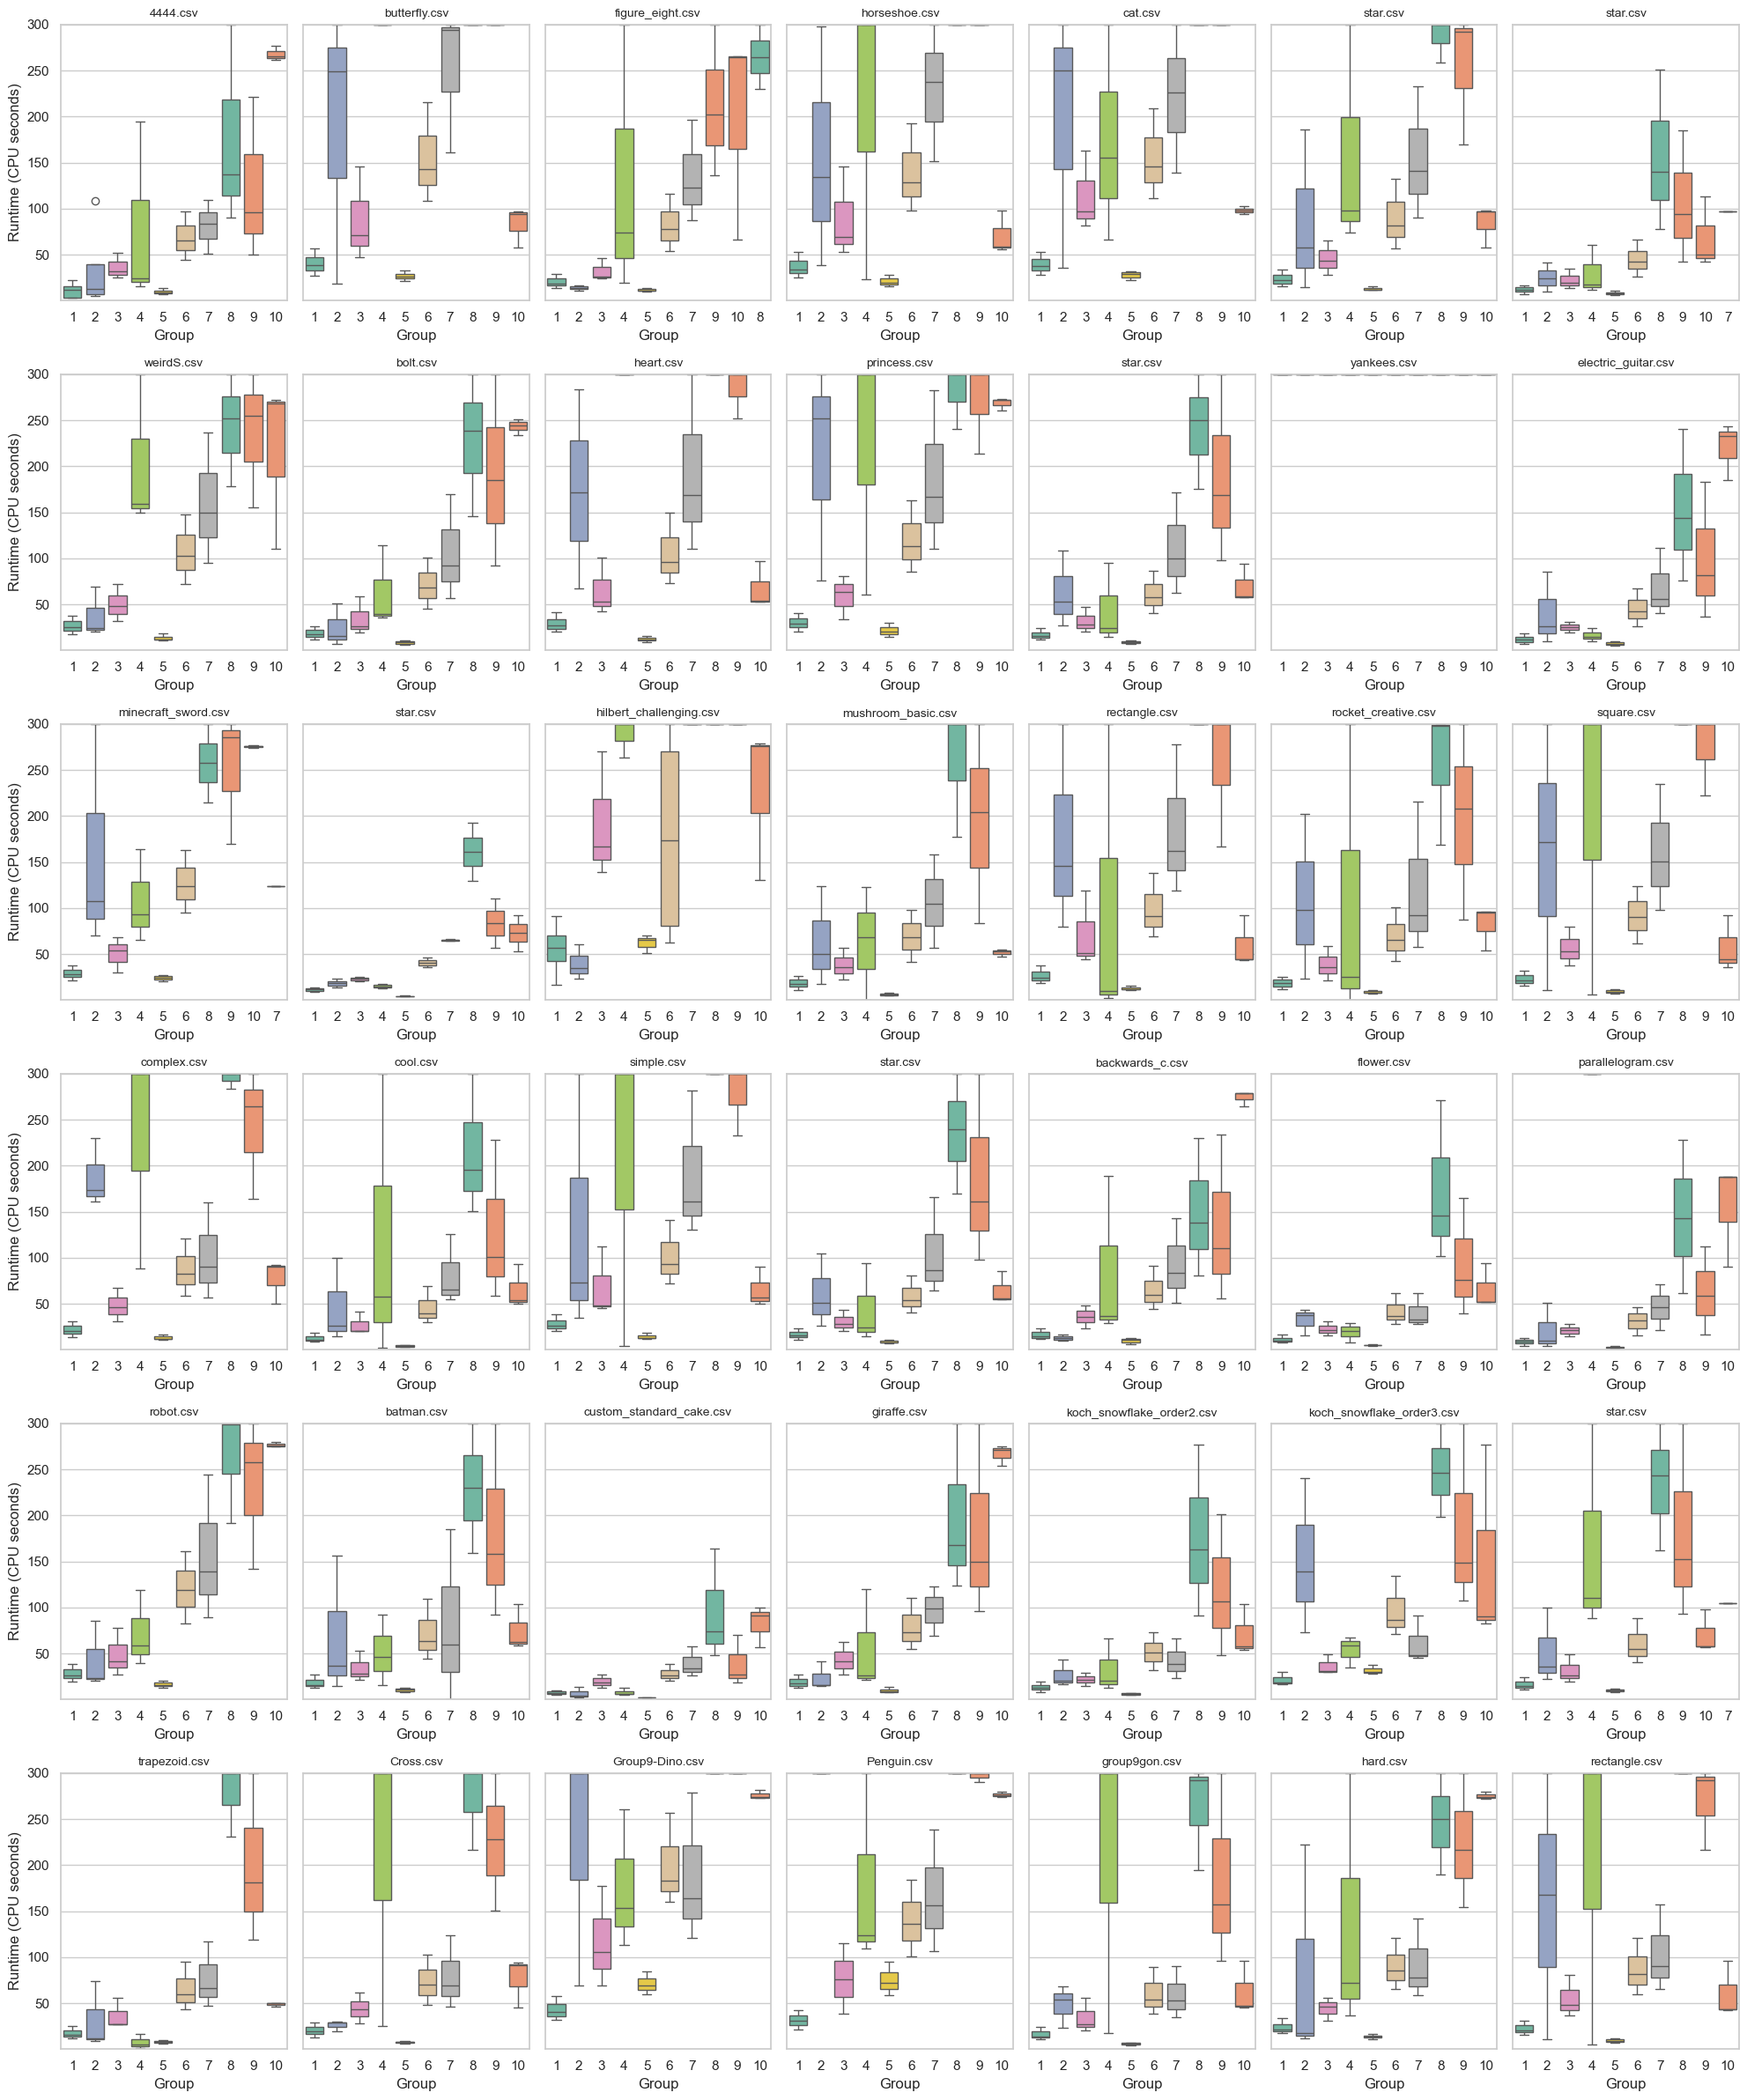

In [120]:
# Load and clean the data
df = pd.read_csv("results.csv")

unique_groups = sorted(df["group"].unique())
palette = sns.color_palette("Set2", n_colors=len(unique_groups))
player_colors = dict(zip(unique_groups, palette))

df["ratios_stdev"] = pd.to_numeric(df["ratios_stdev"], errors="coerce")
df["size_span"] = pd.to_numeric(df["size_span"], errors="coerce")
df["seconds"] = pd.to_numeric(df["seconds"], errors="coerce")
df = df[df["ratios_stdev"].notna()]
df = df[df["size_span"].notna()]
df = df[df["seconds"].notna() & (df["seconds"] >=0)]

# Unique cake paths
cake_paths = df["cake_path"].unique()

# Set grid layout: 6 rows × 7 columns
rows, cols = 6, 7

# Shared y-axis range
ymin, ymax = df["seconds"].min(), df["seconds"].max()

fig, axes = plt.subplots(rows, cols, figsize=(20, 24), sharey=True)
axes = axes.flatten()

for ax, cake_path in zip(axes, cake_paths):
    subset = df[df["cake_path"] == cake_path]
    sns.boxplot(data=subset, x="group", y="seconds", ax=ax, palette=player_colors)
    ax.set_title(f"{cake_path.split('/')[-1]}", fontsize=10)
    ax.set_xlabel("Group")
    ax.set_ylabel("Runtime (CPU seconds)")
    ax.set_ylim(ymin, ymax)

# Remove unused axes if there are fewer cake_paths than grid cells
for i in range(len(cake_paths), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig('all_cakes_group_seconds.pdf')
plt.show()